Ở bài thực hành này, mình sẽ hướng dẫn các ứng dụng **FFT** để phân tích các giải tần và tách âm thanh của kèn Vuvuzela rả khỏi một đoạn âm thanh.

In [125]:
%matplotlib inline

Để tách một loại âm thanh nào đó, chúng ta phải tiến hành lấy mẫu âm thanh đó, sau đó dùng biến đổi **FFT** để phân tích các giải tần số đặc trưng của nó. Sau đó dùng các bộ lọc để lọc các tần số đó ra khỏi âm thanh gốc.

Ở đây, mình đã chuẩn bị 2 file âm thanh: <br>
1. `vuvuzela.wav` có chứa tiềng kèn Vuvuzela.
2. `speech.wav` là một đoạn tiếng người nói bị tiếng kèn Vuvuzela chèn vào.


Nhiệm vụ của chúng ta là tách tiếng kèn Vuvuzela ra khỏi file 'speech.wav'.

Đầu tiên chúng ta hãy phân tích hai file âm thanh này.

In [126]:
import librosa
import numpy as np
import IPython.display
import matplotlib.pyplot as plt
from scipy import signal
from __future__ import division

Dùng hàm `librosa.load()` để đọc 2 file âm thanh `vuvuzela.wav` và `speech.wav`.

In [127]:
v, vr = librosa.load("vuvuzela.wav")
s, sr = librosa.load("speech.wav")
print(v.shape)
print(s.shape)
# Để tiện cho việc phân tích và so sánh các thành phần thành số , chúng ta cho số mẫu trong 2 file này bằng nhau. 
# Trong thực tế  các bạn có thể  tùy ý 
v = v[:70000]
s = s[:70000]

(75208,)
(86784,)


Tiếp theo, sử dụng hàm `numpy.fft.fft()` để biến đổi 2 tín hiệu trên về miền tần số. 

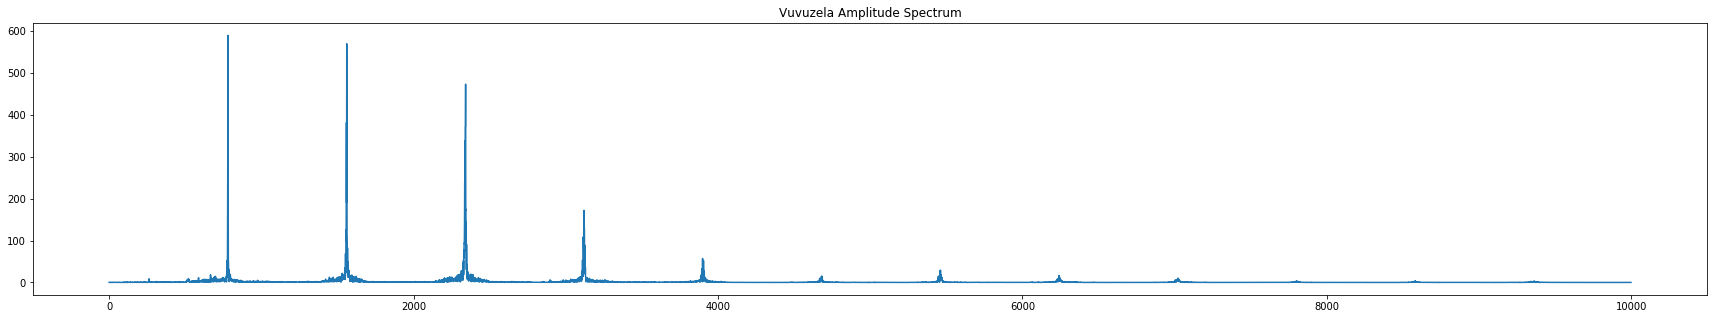

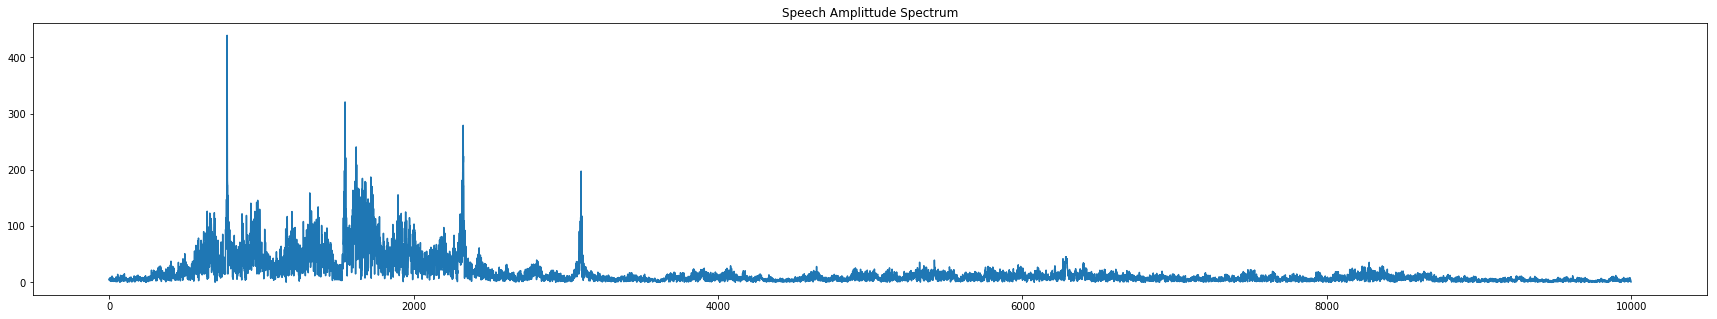

In [128]:
#Biến đổi fft
v_fft = np.fft.fft(v)
# Tính biên độ
v_amplitude = np.abs(v_fft)
# Vẽ phổ biên độ
plt.figure(figsize=(30,5))
plt.plot(v_amplitude[:10000])
plt.title("Vuvuzela Amplitude Spectrum")

# Tương tự đối với file speech.wav
s_fft = np.fft.fft(s)
s_amplitude = np.abs(s_fft)
plt.figure(figsize=(30,5))
plt.plot(s_amplitude[:10000])
plt.title("Speech Amplittude Spectrum")

Từ hình về về phổ biên độ trên, ta có thể thấy được rằng:
1. Âm thanh của Vuvuzela chủ yếu bao gồm 4 giải tần số chính ( 4 **cụm** màu xanh nổi lên ). Chú ý: Mình sử dụng từ **cụm** vì thực ra nó gồm phiền tần số liên tiếp nhau chứ ko phải 1. 
2. Tương tự, khi so sánh phổ biên độ của tiếng người nói. Chúng ta cũng thấy rằng 4 giải phần tần số đó nổi bật hẳn lên => Đó chính là các thành phần tạo nên tiếng kèn trong đoạn tiếng nói.

Chúng ta cần phải tìm cách loại bỏ 4 giải tần này ra khỏi file `speech.wav`. Trước hết, chúng ta cần phải xác định các giải tần củ thể đó là gì, sau đó dùng bộ lọc chặn giải (bandstop filter) để lọc các giải đó ra.

Từ phổ biên độ của tiếng kèn Vuvuzela, chúng ta nhận thấy rằng biên độ tại 4 cụm màu xanh đều lớn hơn 100. Nên chúng ta chỉ lọc lấy những điểm có độ lớn lớn hơn 100.

In [129]:
points_to_filter = [i for i in range(0,35000) if v_amplitude[i]>100]
# Map các điểm sang cáctần số thực tế.
freq_space = vr/len(v)
freqs_to_filter = np.multiply(points_to_filter,freq_space)
print(freqs_to_filter)

[ 245.07   245.385  245.7    246.015  246.33   490.14   490.77   491.085
  491.4    491.715  492.03   492.345  492.66   735.21   735.525  735.84
  736.155  736.47   736.785  737.1    737.415  737.73   738.045  738.36
  738.99   980.91   981.225  981.54   982.8    983.43   983.745]


Bây giờ chúng ta sẽ lần lượt tạo ra các bộ lọc chặn giải và áp dụng vào file tiếng người nói tại các điểm tần số trên.

In [130]:
# Tạo bộ lọc chăn giải (bandstop filter)
Q = 30.0 ## Chất lược bộ lọc
filtered_speech = s
for f0 in freqs_to_filter:
    w0 = f0/(sr/2)  # Chuẩn hóa tần số  (sr/2) -> Nyquist. 
    b, a = signal.iirnotch(w0, Q) # Tạo bộ lọc với 2 tham số w0 và Q.
    filtered_speech = signal.filtfilt(b, a, filtered_speech) # Áp dụng bộ lọc vào file âm thanh.

Âm thanh trước khi lọc:

In [131]:
IPython.display.Audio(s,rate=sr)

Âm thanh sau khi lọc:

In [132]:
IPython.display.Audio(filtered_speech,rate=sr)